# Classificação de Espécies de Íris

Suponhamos que um botânico amador esteja interessado em distinguir as espécies de algumas [flores de íris](https://en.wikipedia.org/wiki/Iris_(plant)) que encontrou. 

Ele coletou algumas medidas associadas a cada íris: o comprimento e largura das pétalas e o comprimento e largura das sépalas, todos medidos em centímetros.

Ele também tem as medidas de algumas íris que foram previamente identificadas por um botânico especialista como pertencentes às espécies **setosa**, **versicolor** ou **virginica**. Por essas medições, ele pode ter certeza de qual espécie cada íris pertence. Vamos supor que essas sejam as únicas espécies que nosso botânico amador encontrará na natureza.

![img](https://i.imgur.com/0Pu5Pog.png)

Nosso objetivo é construir um modelo de Machine Learning que possa aprender com as medidas dessas íris cujas espécies são conhecidas, para que possamos prever a espécie de uma nova íris.

Como temos medidas para as quais conhecemos as espécies corretas de íris, esse é um problema de **Supervised Learning**. 

Neste problema, queremos prever uma das várias opções (a espécie de íris). Este é um exemplo de [problema de classificação](https://machinelearningmastery.com/types-of-classification-in-machine-learning/). Os **outputs** possíveis (diferentes espécies de íris) são chamadas de classes. Cada íris no conjunto de dados pertence a uma das três classes, portanto, este problema é um problema de classificação de três classes.

O **output** desejado para um único ponto de dados (uma íris) é a espécie desta flor. Para um determinado ponto de dados, a espécie a que pertence é chamada de **label** (rótulo).

## Dados

Os dados que usaremos neste exemplo são o **conjunto de dados Iris**, um conjunto de dados clássico em Machine Learning e estatística. 

Ele está incluído no scikit-learn no [módulo de conjuntos de dados](https://scikit-learn.org/stable/datasets/toy_dataset.html).

Ele também pode ser encontrado no [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris).

Podemos carregá-lo chamando a função **load_iris**.

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
type(iris_dataset)

sklearn.utils.Bunch

O objeto iris que é retornado por **load_iris** é um **objeto Bunch**, que é muito semelhante a um dicionário. 

Ele contém chaves e valores.

In [4]:
print("Chaves do Conjunto de Dados Iris: \n{}".format(iris_dataset.keys()))

Chaves do Conjunto de Dados Iris: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


O valor da chave **DESCR** é uma breve descrição do conjunto de dados. 

Nós podemos mostrar o começo da descrição com **slicing**.

In [14]:
print(iris_dataset['DESCR'][:1425] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

O valor da chave **target_names** é uma matriz de strings, contendo as espécies de flor que queremos prever.

In [15]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


O valor de **feature_names** é uma lista de strings, fornecendo a descrição de cada **feature**.

In [16]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Os próprios dados estão contidos nos campos de dados e **target**. 

Os dados contêm as medidas numéricas do comprimento e largura da sépala, comprimento da pétala e largura da pétala em uma matriz NumPy.

In [17]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


As linhas no array de dados correspondem a flores, enquanto as colunas representam as quatro medições que foram feitas para cada flor.

In [18]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


Vemos que o array contém medidas para 150 flores diferentes. 

Lembre-se de que os itens individuais são chamados de **samples** no Machine Learning e suas propriedades são chamadas de **features**.

A forma do array de dados é o número de samples multiplicado por o número de features. Essa é uma convenção no scikit-learn e sempre será considerado que seus dados estão nesta forma. 

Aqui estão os valores dos recursos para os primeiros cinco exemplos.

In [19]:
print("Primeiras cinco de linhas de dados:\n{}".format(iris_dataset['data'][:5]))

Primeiras cinco de linhas de dados:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


A partir desses dados, podemos ver que todas as cinco primeiras flores têm pétalas com 0.2 cm de largura e que a primeira flor tem a sépala mais longa, 5.1 cm.

O array **target** contém as espécies de cada uma das flores que foram medidas, também como um array NumPy.

In [20]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


**target** é um array unidimensional, com uma entrada por flor.

In [21]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


As espécies são codificadas como inteiros de **0** a **2**.

In [22]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Os significados dos números são dados pelo array iris `['target_names']`: 

- **0** significa setosa
- **1** significa versicolor
- **2** significa virginica.

In [24]:
print("Target Names:\n{}".format(iris_dataset['target_names']))

Target Names:
['setosa' 'versicolor' 'virginica']


## Medindo Sucesso: Dados de Treinamento e Teste

Queremos construir um modelo de Machine Learning a partir desses dados que possa prever as espécies de íris para um novo conjunto de medidas. Mas antes de podermos aplicar nosso modelo a novas medições, precisamos saber se ele realmente funciona - isto é, se devemos confiar em suas previsões.

Infelizmente, não podemos usar os dados que usamos para construir o modelo para avaliá-lo. Isso ocorre porque nosso modelo sempre pode simplesmente lembrar todo o conjunto de treinamento e, portanto, sempre irá prever o **label** correto para qualquer ponto no conjunto de treinamento.

Este “lembrar” não nos indica se nosso modelo irá generalizar bem (em outras palavras, se ele também terá um bom desempenho em novos dados).

Para avaliar o desempenho do modelo, mostramos a ele novos dados (dados que ele não viu antes) para os quais temos **labels**. Isso geralmente é feito dividindo os dados **labeled** que coletamos (aqui, nossas 150 medições de flores) em duas partes. Uma parte dos dados é usada para construir nosso modelo de Machine Learning e é chamada de dados de treinamento ou **conjunto de treinamento**. O restante dos dados será usado para avaliar quão bem o modelo funciona; isso é chamado de dados de teste, **conjunto de teste** ou conjunto de validação.

Scikit-Learn contém uma função que embaralha o conjunto de dados e o divide para você: a função **train_test_split**. Essa função extrai 75% das linhas nos dados como o conjunto de treinamento, junto com os rótulos correspondentes para esses dados. Os 25% restantes dos dados, junto com os rótulos restantes, são declarados como o conjunto de teste. Decidir quantos dados você deseja colocar no treinamento e no conjunto de teste, respectivamente, é algo o que é arbitrário, mas usar um conjunto de teste contendo 25% dos dados é uma boa regra.

No scikit-learn, os dados geralmente são denotados com um **X** maiúsculo, enquanto os **labels** são denotados por um **y** minúsculo. Isso é inspirado pela formulação padrão $f(x) = y$ em matemática, onde $x$ é o **input** para uma função e $y$ é o **output**. Seguindo mais convenções da matemática, usamos um **X** maiúsculo porque os dados são um array bidimensional (uma matriz) e um y minúsculo porque o destino é um array unidimensional (um vetor). 

Vamos chamar **train_test_split** em nossos dados e atribuir os **outputs** usando esta nomenclatura.

In [25]:
from sklearn.model_selection import train_test_split

X = iris_dataset['data']
y = iris_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X,y)

Antes de fazer a divisão, a função **train_test_split** embaralha o conjunto de dados usando um gerador de números pseudo-aleatórios. Se apenas pegássemos os últimos 25% dos dados como um conjunto de teste, todos os pontos de dados teriam o **label** 2, já que os pontos de dados são ordenados pelo **label** (consulte o **output** para iris `['target']` mostrada anteriormente). Usar um conjunto de teste contendo apenas uma das três classes não nos diria muito sobre o quão bem nosso modelo generaliza, então embaralhamos nossos dados para garantir que os dados de teste contenham dados de todas as classes.

O **output** da função **train_test_split** é **X_train**, **X_test**, **y_train** e **y_test**, que são todos arrays NumPy. 

**X_train** contém 75% das linhas do conjunto de dados e **X_test** contém os 25% restantes.

In [26]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [27]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


In [29]:
int((75/100) * 150)

112

In [32]:
round(((25/100) * 150))

38

## Inspecionando os Dados

Antes de construir um modelo de Machine Learning, geralmente é uma boa ideia inspecionar os dados, para ver se a tarefa pode ser resolvida facilmente sem Machine Learning ou se as informações desejadas podem não estar contidas nos dados.

Além disso, inspecionar seus dados é uma boa maneira de encontrar anormalidades e peculiaridades. Talvez algumas de suas íris tenham sido medidas em polegadas e não em centímetros, por exemplo. No mundo real, inconsistências nos dados e medições inesperadas são muito comuns.

Uma das melhores maneiras de inspecionar os dados é visualizá-los. Uma maneira de fazer isso é usando um gráfico de dispersão (**scatterplot**). Um gráfico de dispersão dos dados coloca um recurso ao longo do **eixo x** e outro ao longo do **eixo y** e desenha um ponto para cada ponto de dados. Infelizmente, as telas dos computadores têm apenas duas dimensões, o que nos permite traçar apenas dois (ou talvez três) features de cada vez. É difícil plotar conjuntos de dados com mais de três features dessa maneira. Uma maneira de contornar esse problema é fazer um gráfico de pares (**pairplot**), que examina todos os pares de features possíveis. Se você tiver um pequeno número de features, como os quatro que temos aqui, isso é bastante razoável. Você deve ter em mente, entretanto, que um gráfico de pares não mostra a interação de todos os features de uma vez, portanto, alguns aspectos interessantes dos dados podem não ser revelados ao visualizá-los dessa forma.

A seguir temos um gráfico de pares dos features no conjunto de treinamento. Os pontos de dados são coloridos de acordo com a espécie à qual a íris pertence. Para criar o gráfico, primeiro convertemos o array NumPy em um DataFrame do pandas. pandas tem uma função para criar gráficos de pares chamados **scatter_matrix**. A diagonal desta matriz é preenchida com histogramas de cada feature.

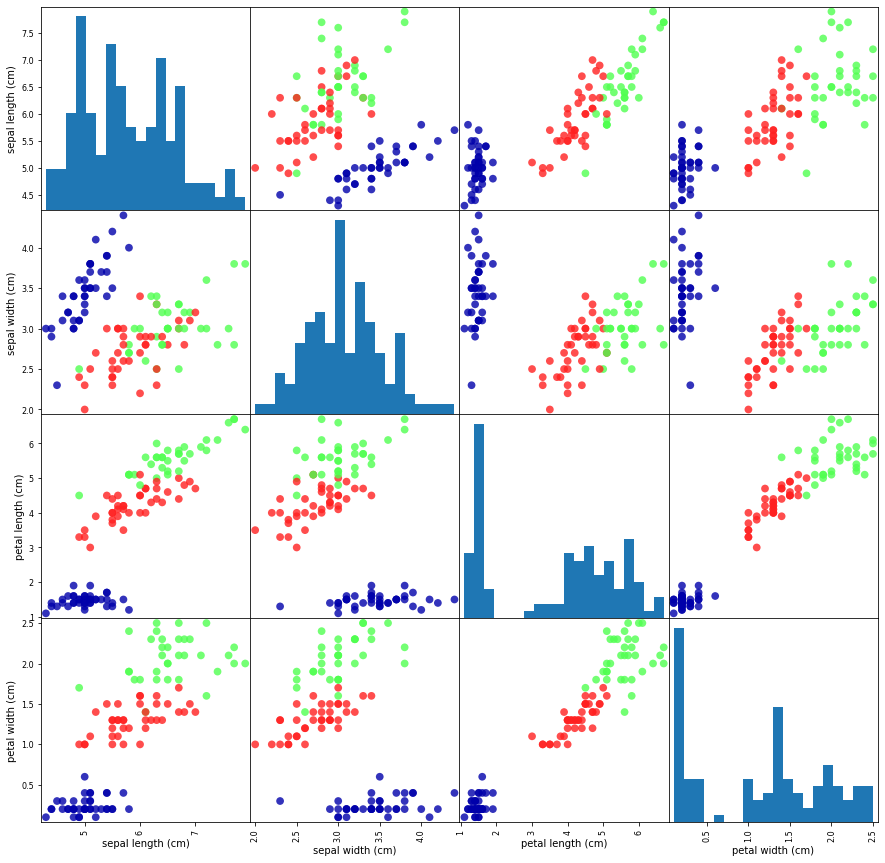

In [36]:
import pandas as pd
import mglearn

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),marker='o', hist_kwds={'bins': 20}, s=60, alpha=0.8, cmap=mglearn.cm3);

A partir dos gráficos, podemos ver que as três classes parecem estar relativamente bem separadas usando as medidas das sépalas e pétalas. Isso significa que um modelo de Machine Learning provavelmente será capaz de aprender a separá-los.

## Construindo o Modelo: K-Nearest Neighbors

Agora podemos começar a construir o modelo real de Machine Learning. Existem muitos algoritmos de classificação no scikit-learn que podemos usar. Aqui, usaremos um classificador chamado de **K-Nearest Neighbors**, que é fácil de entender. A construção deste modelo consiste apenas em armazenar o conjunto de treinamento. Para fazer uma previsão para um novo ponto de dados, o algoritmo encontra o ponto no conjunto de treinamento que está mais próximo do novo ponto. Em seguida, ele atribui o **label** deste ponto de treinamento ao novo ponto de dados.

O **k** em **K-Nearest Neighbors** significa que em vez de usar apenas o vizinho mais próximo para o novo ponto de dados, podemos considerar qualquer número fixo de **k** de vizinhos no treinamento (por exemplo, os três ou cinco vizinhos mais próximos). Então, podemos fazer uma previsão usando a classe majoritária entre esses vizinhos. 

Todos os modelos de Machine Learning no scikit-learn são implementados em suas próprias classes, que são chamadas de classes **Estimator**. O algoritmo de classificação de K-Nearest Neighbors é implementado na classe **KNeighborsClassifier** no módulo **neighbors**. Antes de podermos usar o modelo, precisamos instanciar a classe em um objeto. É quando definiremos quaisquer parâmetros do modelo. O parâmetro mais importante de KNeighborsClassifier é o número de vizinhos (**k**), que definiremos como **1**.

In [129]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

O objeto **knn** encapsula o algoritmo que será usado para construir o modelo a partir dos dados de treinamento, bem como o algoritmo para fazer previsões sobre novos pontos de dados. Ele também conterá as informações que o algoritmo extraiu dos dados de treinamento. No caso de **KNeighborsClassifier**, ele armazenará apenas o conjunto de treinamento.

Para construir o modelo no conjunto de treinamento, chamamos o método **fit** do objeto knn, que leva como argumentos o array NumPy **X_train** contendo os dados de treinamento e o array NumPy **y_train** dos labels de treinamento correspondentes.

In [130]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

O método **fit** retorna o próprio objeto knn (e o modifica in-place), portanto, obtemos uma representação de string de nosso classificador. A representação nos mostra quais parâmetros foram usados na criação do modelo. Quase todos eles são os valores padrão, mas você também pode encontrar `n_neighbors = 1`, que é o parâmetro que passamos. A maioria dos modelos no scikit-learn tem muitos parâmetros, mas a maioria deles são otimizados para velocidade ou para casos de uso muito especiais.

## Fazendo Previsões

Agora podemos fazer previsões usando este modelo em novos dados para os quais podemos não saber os **labels** corretos. Imagine que encontramos uma íris na natureza com um comprimento de sépala de 5 cm, uma largura de sépala de 2.9 cm, um comprimento de pétala de 1 cm e uma largura de pétala de 0.2 cm.

Que espécie de íris seria esta? 

Podemos colocar esses dados em um array NumPy, novamente calculando a forma, ou seja, o número de **samples** (1) multiplicado pelo número de **features** (4).

In [131]:
import numpy as np

X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


Observe que fizemos as medições dessa única flor em uma linha em um array NumPy bidimensional, pois o scikit-learn sempre espera arrays bidimensionais para os dados. 

Para fazer uma previsão, chamamos o método de **predict** do objeto **knn**.

In [132]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


Nosso modelo prevê que esta nova íris pertence à classe **0**, o que significa que sua espécie é **setosa**. Mas como sabemos se podemos confiar em nosso modelo? Não sabemos as espécies corretas desta amostra, que é o ponto principal da construção do modelo!

## Avaliando o Modelo

É aqui que entra o **conjunto de teste** que criamos anteriormente. Esses dados não foram usados para construir o modelo, mas sabemos qual é a espécie correta para cada íris no conjunto de teste.

Portanto, podemos fazer uma previsão para cada íris nos dados de teste e compará-la com seu **label** (a espécie conhecida). 

Podemos medir o quão bem o modelo funciona calculando a **accuracy**, que é a fração de flores para a qual a espécie certa foi prevista.

In [133]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [1 0 1 0 1 1 1 1 0 1 0 2 1 1 2 0 2 2 2 0 2 2 0 2 1 2 1 2 2 1 2 2 0 0 2 0 2
 1]


In [134]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.92


Também podemos usar o método **score** do objeto knn, que calculará a **accuracy** do conjunto de teste para nós.

In [135]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.92


Para este modelo, a **accuracy** do conjunto de teste é de cerca de **0.92**, o que significa que fizemos a previsão correta para 92% das íris no conjunto de teste. Sob algumas suposições matemáticas, isso significa que podemos esperar que nosso modelo esteja correto 92% das vezes para novas íris.

## Referência

[Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/)